<a href="https://colab.research.google.com/github/Rohith18744/Bikes_Regression_Dataset/blob/main/Copy_of_Bikes_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sb
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [ ]:

cols=["bike_count","hour","temp","humidity","wind","visibility","dew_pt_temperature","rain","snow","functional","rented_bike_count"]
df=pd.read_csv("SeoulBikeData.csv", encoding='cp949').drop(["Date","Holiday","Seasons"],axis=1)
df.columns=cols
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temperature,rain,snow,functional,rented_bike_count
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [ ]:
df["functional"]=(df["functional"]=="Yes").astype(int)
df=df[df["hour"]==12]
df=df.drop(["hour"],axis=1)

In [ ]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temperature,rain,snow,functional,rented_bike_count
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0,Yes
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0,Yes
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0,Yes
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0,Yes
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0,Yes


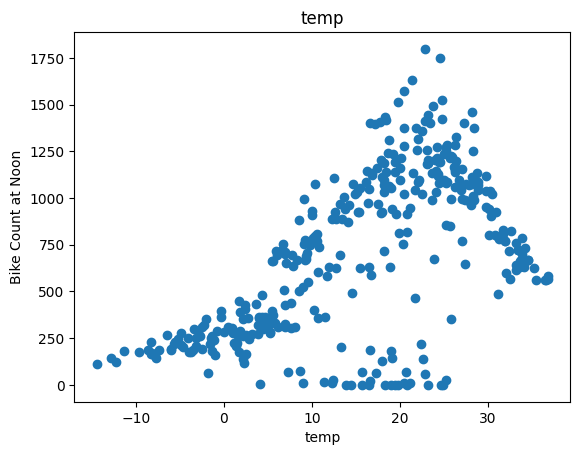

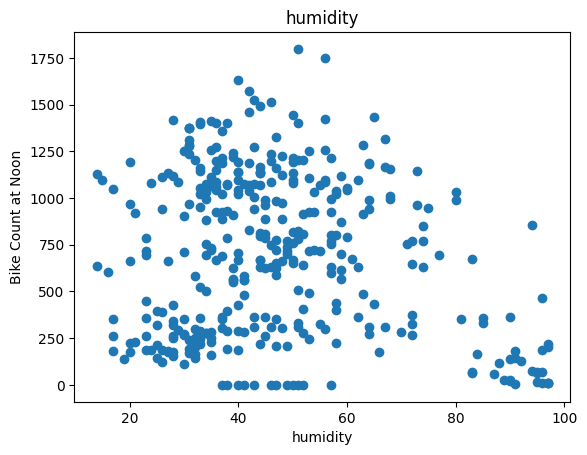

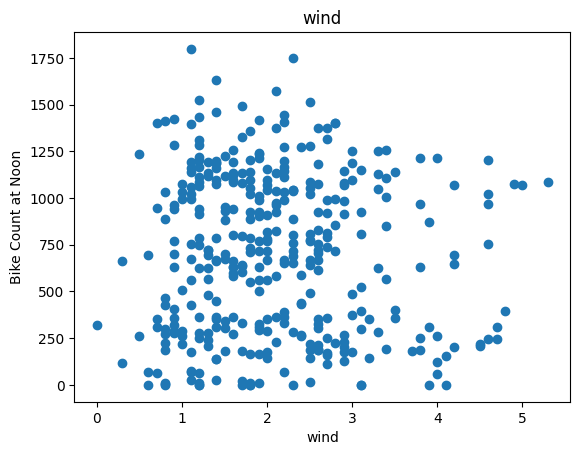

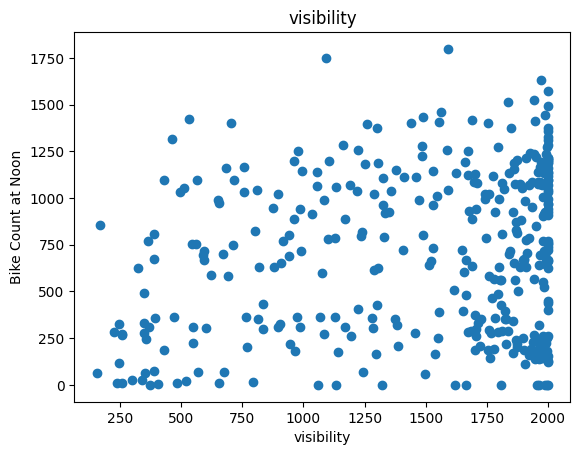

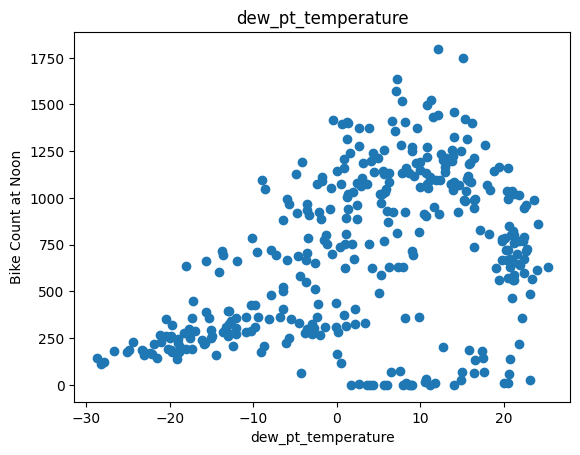

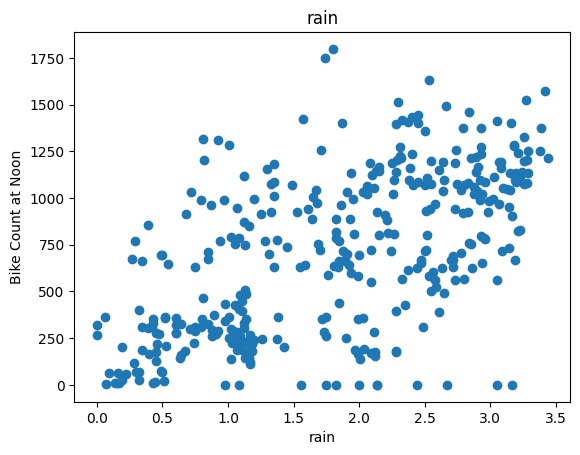

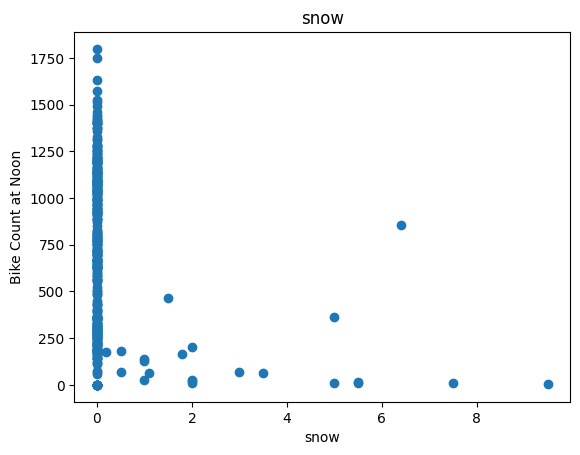

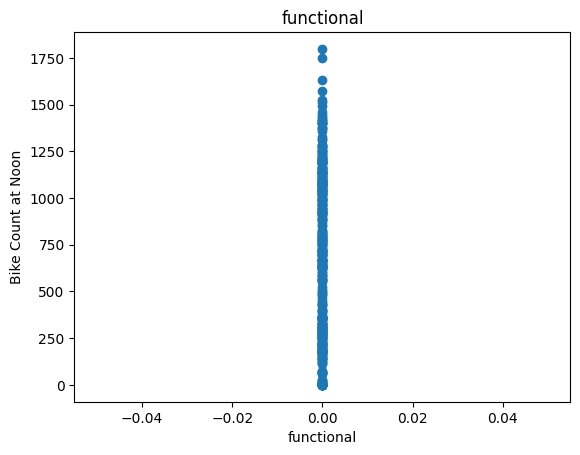

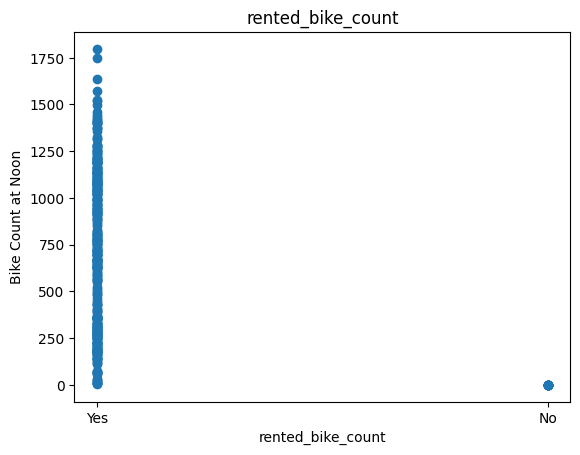

In [ ]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()

In [ ]:
df=df.drop(["wind","visibility","functional"],axis=1)

In [ ]:
df.head()

,bike_count,temp,humidity,dew_pt_temperature,rain,snow,rented_bike_count
12,449,1.7,23,-17.2,1.11,0.0,Yes
36,479,4.3,41,-7.8,1.09,0.0,Yes
60,333,5.8,85,3.4,0.43,0.0,Yes
84,393,-0.3,38,-12.9,1.11,0.0,Yes
108,321,-2.3,25,-19.7,0.00,0.0,Yes


In [ ]:
train,val,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def get_xy(dataframe,y_label,x_labels=None):
  dataframe=copy.deepcopy(dataframe)
  if x_labels is None:
    x=dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels)==1:
      x=dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      x=dataframe[x_labels].values
  y=dataframe[y_label].values.reshape(-1,1)
  data=np.hstack((x,y))
  return data,x,y

In [ ]:
_,x_train_temp,y_train_temp=get_xy(train,"bike_count",x_labels=["temp"])
_,x_val_temp,y_val_temp=get_xy(val,"bike_count",x_labels=["temp"])
_,x_test_temp,y_test_temp=get_xy(test,"bike_count",x_labels=["temp"])

In [ ]:
temp_reg=LinearRegression()
temp_reg.fit(x_train_temp,y_train_temp)

LinearRegression()

In [ ]:
print(temp_reg.coef_,temp_reg.intercept_)

[[20.69330412]] [381.89952706]


In [ ]:
temp_reg.score(x_test_temp,y_test_temp)

0.43711634946310773

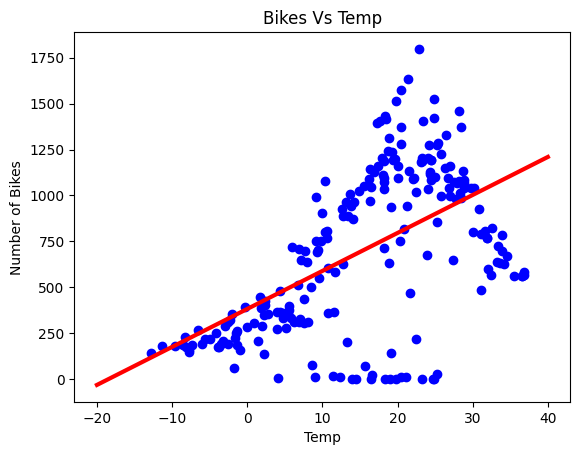

In [ ]:
plt.scatter(x_train_temp,y_train_temp,label="Data",color="blue")
x=tf.linspace(-20,40,100).numpy().reshape(-1, 1)
plt.plot(x,temp_reg.predict(x),label="Fit",color="red",linewidth=3)
plt.title("Bikes Vs Temp")
plt.xlabel("Temp")
plt.ylabel("Number of Bikes")
plt.show()